In [1]:
# imports 
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Compute num expressions
def num_expressions(n, b, B, simplify=True):
    if n > b*b + B: return 0
    if simplify and n%b == 0: return 1 
    return 2 if n%b <= B-b else 1

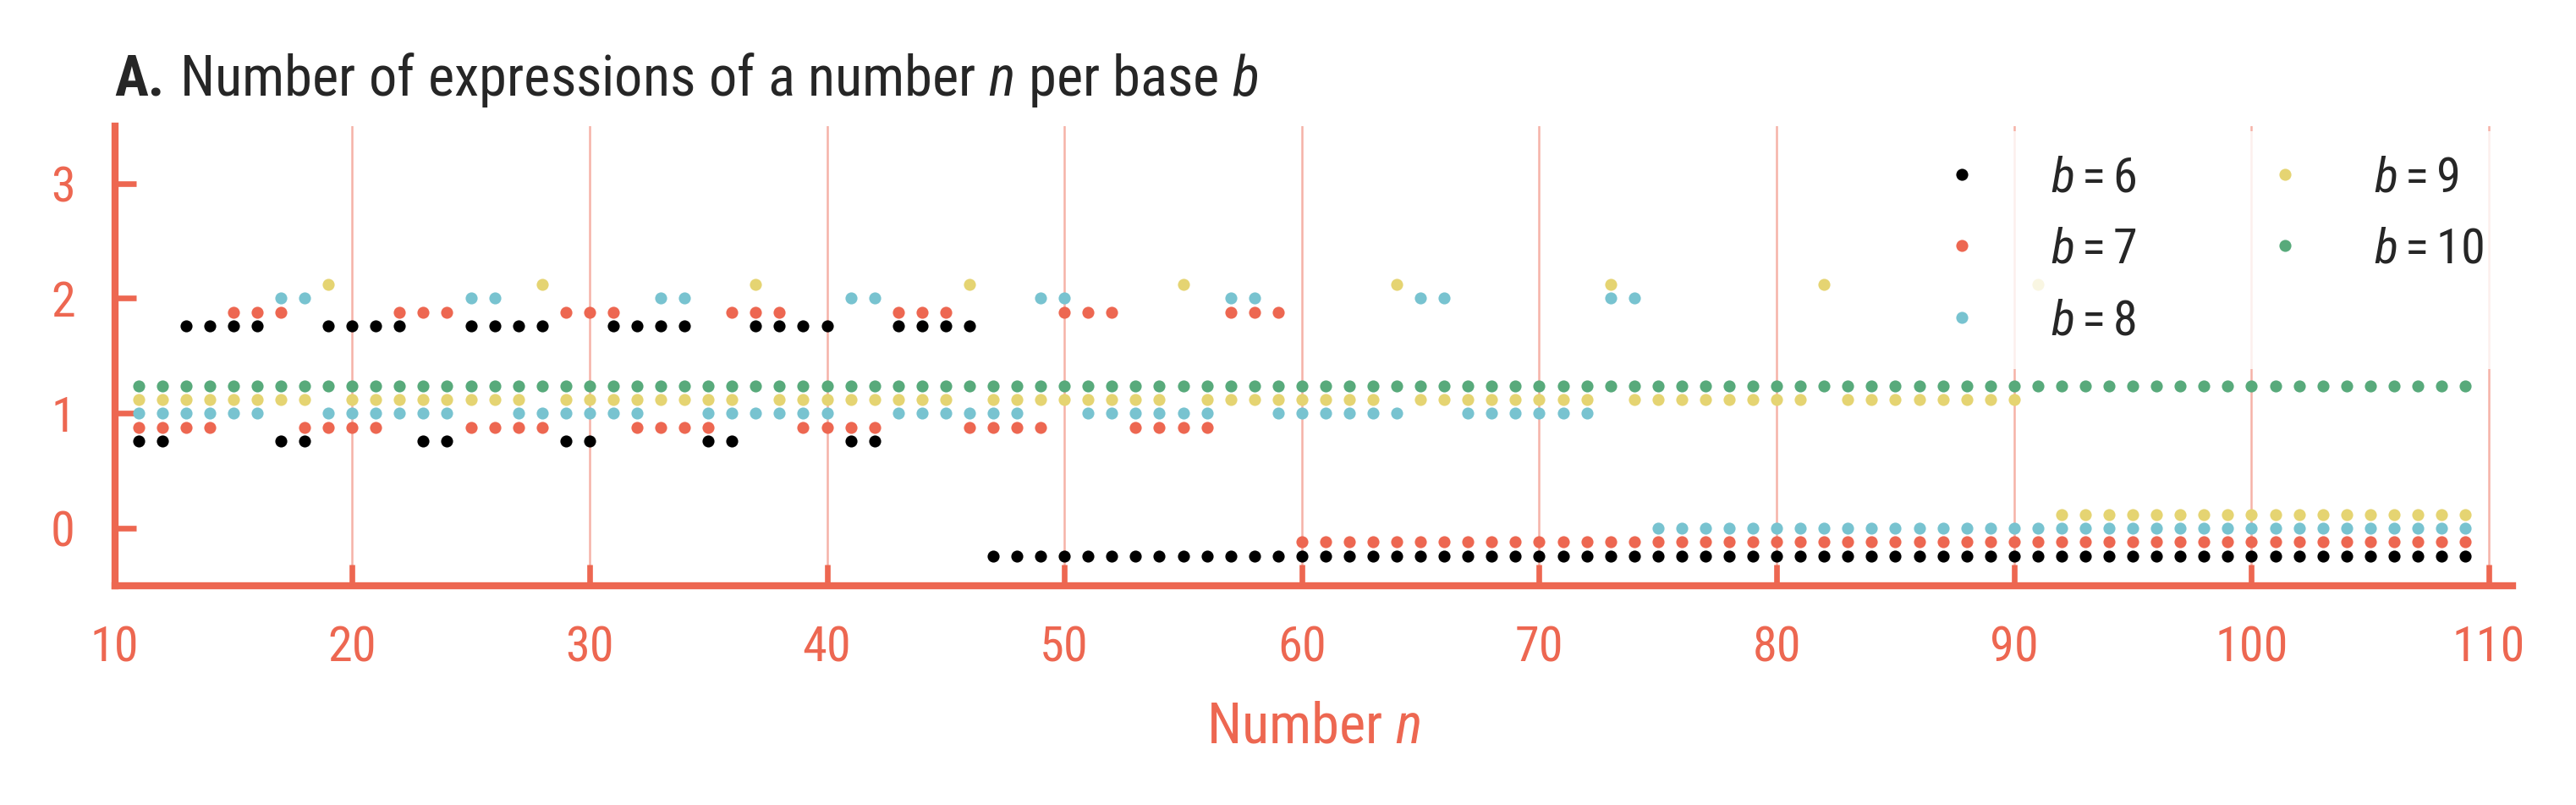

In [15]:
#Plot
figure(figsize=cm2inch(12,2.3))
xs = arange(11,110)

for i, b in enumerate([6,7,8,9,10]):
    expr = array([num_expressions(n,b,10) for n in xs])
    plot(xs, expr+.12*(i-2), 'o', ms=1.7, label='$b={}$'.format(b))

ylim(-0.5, 3.5)
legend(ncol=2, loc='upper right')
title('Number of expressions of a number $n$ per base $b$')
xlabel('Number $n$')
ax = gca()
restyle_title(ax)
ax.locator_params(nbins=4, axis='y')
ax.locator_params(nbins=20, axis='x')
ax.set_xlim(10, 111)
sns.despine()
ax.xaxis.grid()

subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('FIG09-base-expressions.pdf', bbox_inches='tight')